In [1]:
#Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, metrics

# pour que les plots soient affichés
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('winequality-white.csv', sep=";")
print (data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [3]:
#Séparation features et variables à prédire
X = data.as_matrix(data.columns[:-1])
y = data.as_matrix([data.columns[-1]])
y = y.flatten()

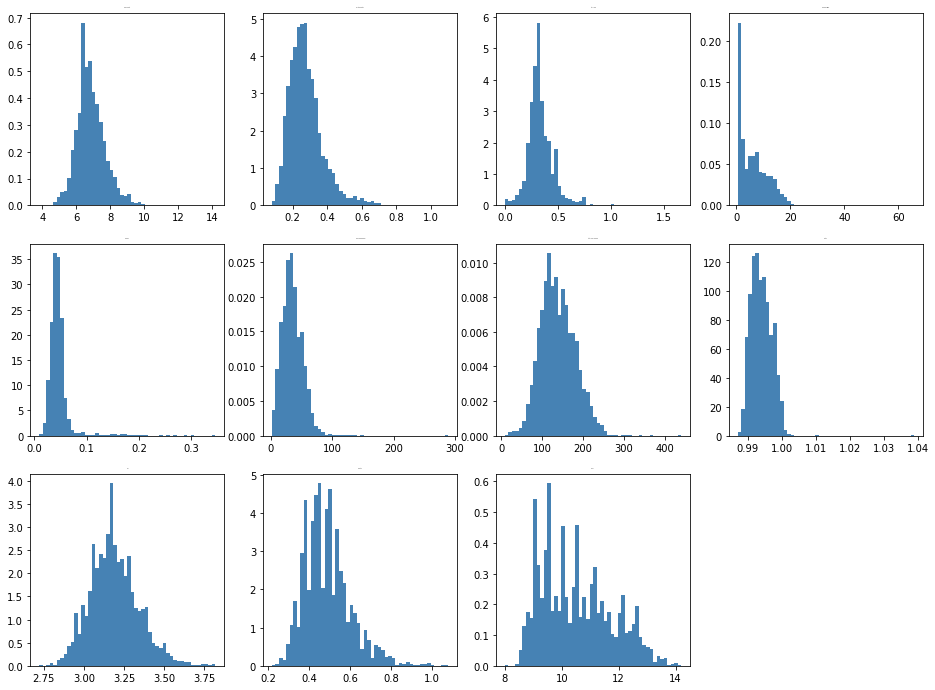

In [4]:
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=50, color='steelblue',normed=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=1)

Pour pouvoir appliquer du KNN, il faut classer la variables réponse
Si qualité > 6 alors Y = 1 sinon = 0


In [5]:
data_class = data
data_class['quality']= np.where(data_class['quality']<6, 0, 1)
print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36           20.70      0.045   
1               6.3             0.300         0.34            1.60      0.049   
2               8.1             0.280         0.40            6.90      0.050   
3               7.2             0.230         0.32            8.50      0.058   
4               7.2             0.230         0.32            8.50      0.058   
5               8.1             0.280         0.40            6.90      0.050   
6               6.2             0.320         0.16            7.00      0.045   
7               7.0             0.270         0.36           20.70      0.045   
8               6.3             0.300         0.34            1.60      0.049   
9               8.1             0.220         0.43            1.50      0.044   
10              8.1             0.270         0.41            1.45      0.033   
11              8.6         

In [15]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
X = std_scale.transform(X)

#Création d'une seul matrice car ma fonction prends en entrée une matrice
data_std = np.c_[X, y]

print(data_std)

[[  1.72096961e-01  -8.17699008e-02   2.13280202e-01 ...,  -3.49184257e-01
   -1.39315246e+00   1.00000000e+00]
 [ -6.57501128e-01   2.15895632e-01   4.80011213e-02 ...,   1.34184656e-03
   -8.24275678e-01   1.00000000e+00]
 [  1.47575110e+00   1.74519434e-02   5.43838363e-01 ...,  -4.36815783e-01
   -3.36667007e-01   1.00000000e+00]
 ..., 
 [ -4.20473102e-01  -3.79435433e-01  -1.19159198e+00 ...,  -2.61552731e-01
   -9.05543789e-01   1.00000000e+00]
 [ -1.60561323e+00   1.16673788e-01  -2.82557040e-01 ...,  -9.62604939e-01
    1.85757201e+00   1.00000000e+00]
 [ -1.01304317e+00  -6.77100966e-01   3.78559282e-01 ...,  -1.48839409e+00
    1.04489089e+00   1.00000000e+00]]


In [16]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from statistics import mean
from sklearn import preprocessing

def VCKnn(data,tab,nb_fold):
    """
    Cette fonction prends en entrée :
        - data : une matrice de variables explicatives et une variable réponse
        - tab : une liste des différentes valeurs de n voisins à comparer
        - nb_fold : le nombre de partition pour effectuer la validation croisée
        
    Ceete fonction retourne :
        La précision pour chaque valeur de voisins choisis, pour chaque fold puis la moyenne sur 
        l'ensemble des validations croisés effectuées
    
    """
    nb_ind = X.shape[0]
    folds = []
    folds.append(0)
    for i in range (nb_fold):
        ind = round(nb_ind/nb_fold * (i+1))
        folds.append(ind)
    for i in range (len(tab['n_neighbors'])):
        accus = []
        nb_voisins = tab['n_neighbors'][i]
        for j in range(1,(len(folds))):
            test = data[folds[j-1]:folds[j]]
            train = pd.concat([data[folds[j-2]:folds[j-1]],data[folds[j]:nb_ind]])
            xtest = test.as_matrix(test.columns[:-1])
            ytest = test.as_matrix([test.columns[-1]])
            xtrain = train.as_matrix(train.columns[:-1])
            ytrain = train.as_matrix([train.columns[-1]])
            clf =  KNeighborsClassifier(n_neighbors = nb_voisins)
            clf.fit(xtrain,ytrain)
            print(nb_voisins,"voisins : ", clf.score(xtest,ytest))
            accus.append(clf.score(xtest,ytest))
        print("Moyenne accuracy ", nb_voisins, " voisins est" ,mean(accus),"(+-",round(mean(accus)-min(accus),2),")")

In [18]:
VCKnn(data_class,param_grid,5)

/Users/florianlockfat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


3 voisins 0.609183673469
3 voisins 0.608784473953
3 voisins 0.605102040816
3 voisins 0.719101123596
3 voisins 0.714285714286
Moyenne accuracy  3  voisins est 0.651291405224 (+- 0.05 )
5 voisins 0.617346938776
5 voisins 0.624106230848
5 voisins 0.623469387755
5 voisins 0.708886618999
5 voisins 0.717346938776
Moyenne accuracy  5  voisins est 0.658231223031 (+- 0.04 )
7 voisins 0.630612244898
7 voisins 0.620020429009
7 voisins 0.624489795918
7 voisins 0.723186925434
7 voisins 0.718367346939
Moyenne accuracy  7  voisins est 0.66333534844 (+- 0.04 )
9 voisins 0.648979591837
9 voisins 0.603677221655
9 voisins 0.620408163265
9 voisins 0.722165474974
9 voisins 0.733673469388
Moyenne accuracy  9  voisins est 0.665780784224 (+- 0.06 )
11 voisins 0.632653061224
11 voisins 0.604698672114
11 voisins 0.628571428571
11 voisins 0.732379979571
11 voisins 0.718367346939
Moyenne accuracy  11  voisins est 0.663334097684 (+- 0.06 )
13 voisins 0.624489795918
13 voisins 0.610827374872
13 voisins 0.6051020408